# __CH 10. 워드 임베딩(Word Enbedding)__

- 컴퓨터가 자연어를 이해할 수 있도록 변환하는 과정
- 최근에 많이 사용하는 방법: 워드투벡터(Word2Vec), 글로브(GloVe)

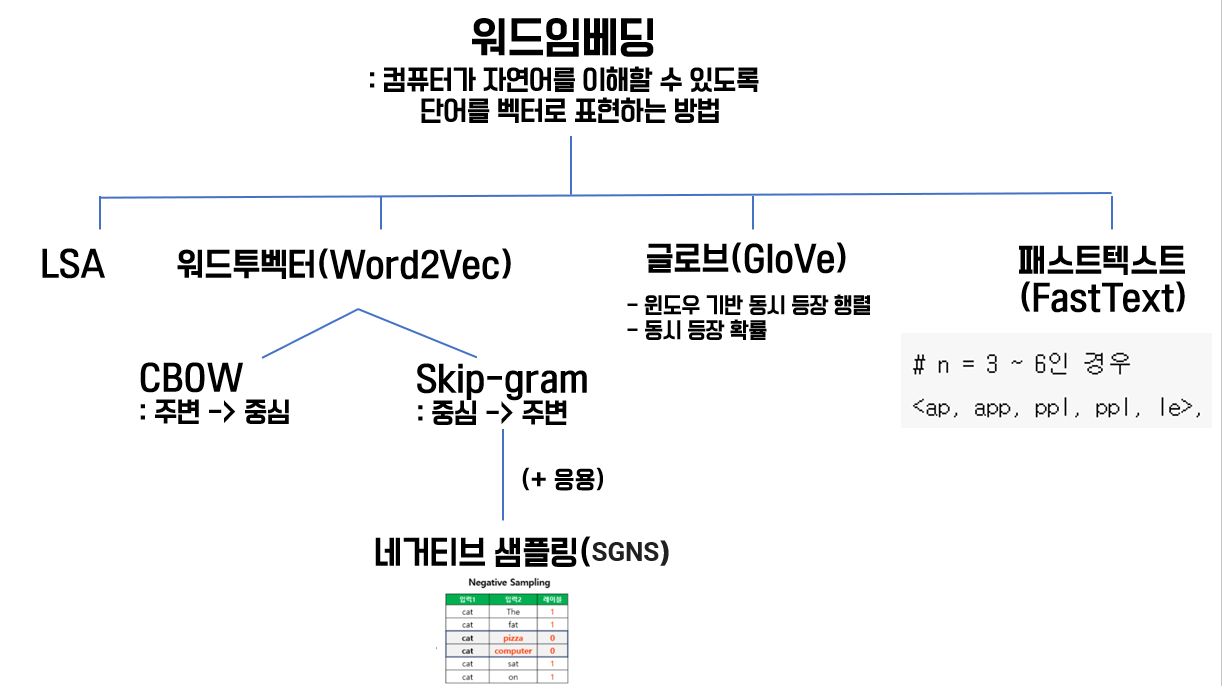

## __10-1) 워드 임베딩(Word Enbedding)__
- 단어를 벡터로 표현하는 방법

### __1. 희소표현(Sparse Representation)__
- 벡터 또는 행렬의 값이 대부분 0으로 표현되는 방법  
Ex) 원-핫 인코딩에서 특정 단어 인덱스 값 = 1, 나머지 = 0  
- 문제점: 표현하고자 하는 단어의 개수 증가 -> 벡터 차원 엄청 커짐  
Ex) 단어 = 10,000개, 강아지의 인덱스 5
        강아지 = [ 0 0 0 0 1 0 0 0 0 ... .. ... 0]

### __2. 밀집표현(Dense Representation)__
- 희소표현과 반대 개념
- 벡터차원 = 단어 집합 크기 NO!  
Ex) 위의 예시에서 차원 = 128로 지정, 
        강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... ...] # 벡터 차원 =128
- 벡타 차원이 조밀해짐

### __3. 워드 임베딩(Word Embedding)__
- 단어를 밀집벡터로 표현하는 방법
- 임베딩벡터 라고도 함
- 워드임베딩의 방법론: LSA, Word2Vec, GloVe 등
- 원-핫 벡터 vs 임베딩벡터  
    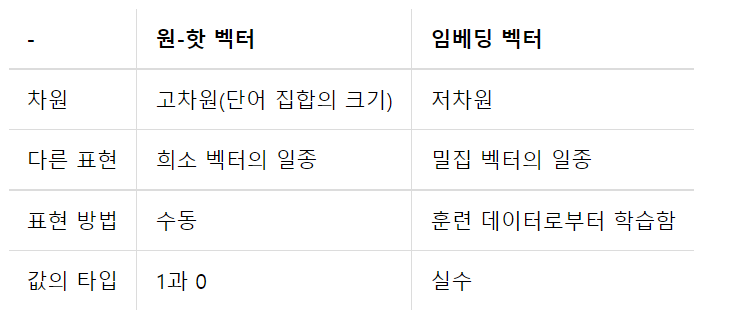

## __10-2) 워드투벡터(Word2Vec)__
- 원-핫 인코딩: 단어 간 유사도 계산할 수 없음
- 워드투벡터: 단어 간 유사도 계산 가능
- 워드투벡터가 하는 일의 예시
 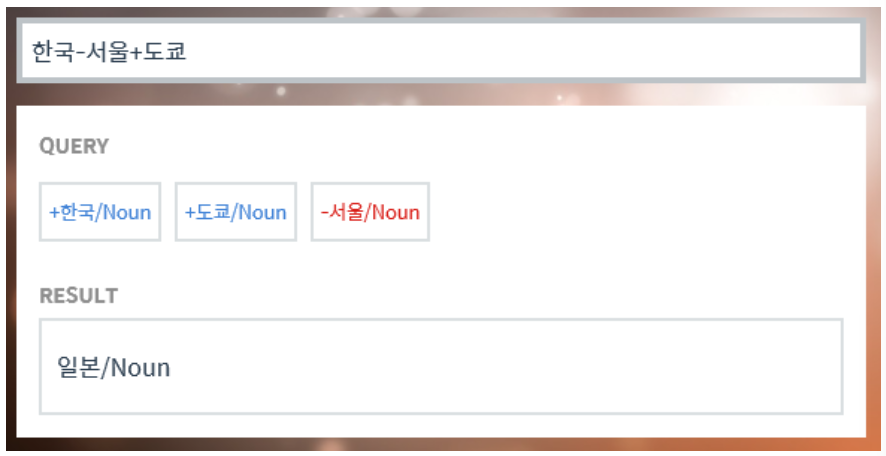

   Ex)고양이 +  애교 = 강아지
      한국 - 서울 + 도쿄  = 일본

<!-- ### 분산표현(Distributed Representation)

- 희소표현 (ex 원-핫 벡터): 단어 간 유사성 표현할 수 없음
- 분산표현: 단어의 의미를 다차원 공간에 벡터화 하는 방법
- 가정: 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다
- 희소표현
ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]
- 분산표현
ex) 강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]
   저차원에 단어의 의미를 여러 차원에 분산
   단어 간 유사도 계산 가능
- 이를 위한 학습방법: NNLM, RNNLM, Word2Vec -->

### __1. CBOW(Continuous Bag of Words)__
- Word2Vec에는 2가지 방식 존재  
   1) CBOW: 주변 단어들을 통해 중간에 있는 단어 예측  
   2) Skip-Gram: 중간에 있는 단어를 통해 주변 단어 예측

- "The fat cat __sat__ on the mat" (sat 예측해야함)
- 예측해야하는 단어(sat): 중심 단어(center word)
- 예측에 사용되는 단어(the, fat, cat, on, the, mat): 주변 단어(context word)
- 앞, 뒤로 몇 개의 단어를 볼 것인가: 윈도우(window)
- 윈도우의 크기=n -> 주변 단어=2n
 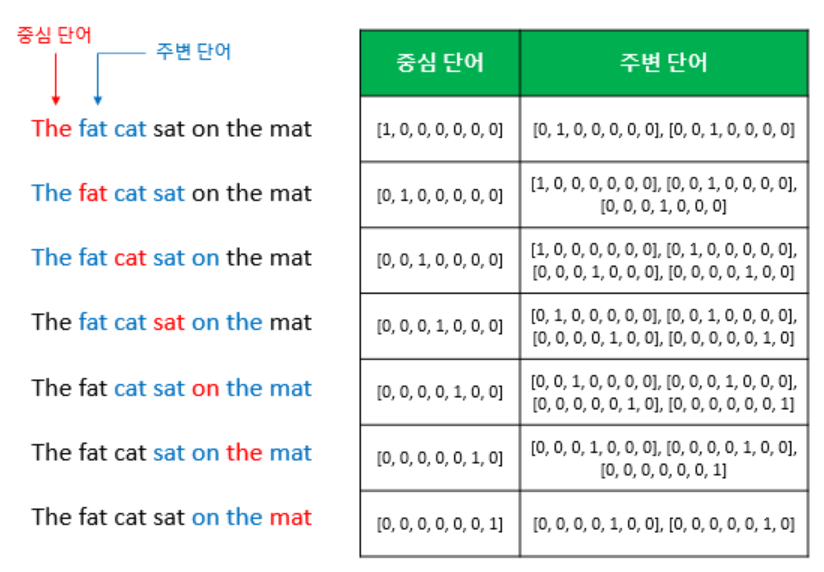
- 슬라이딩 윈도우(sliding window): 윈도우 움직이면서 학습을 위한 데이터셋 만드는 과정


#### CBOW의 인공신경망 도식화 (윈도우=2)
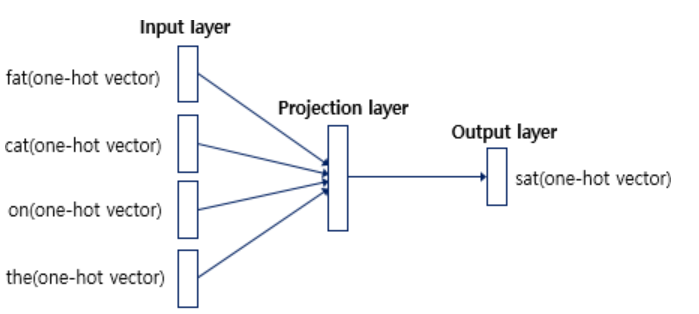

- Input layer: 주변 단어들이 원-핫 벡터
- Output layer: 중간 단어(예측해야하는 단어)의 원-핫 벡터
- Word2Vec은 딥러닝 모델이 아님
- 이유: 입력층과 출력층 사이에 은닉층의 개수가 충분하지 않고 1개만 존재하기 때문
- 즉, 얕은신경망
- 은닉층에 활성화함수 존재하지 않음
- 대신, 투사층 존재(projection layer)


#### layer 확대
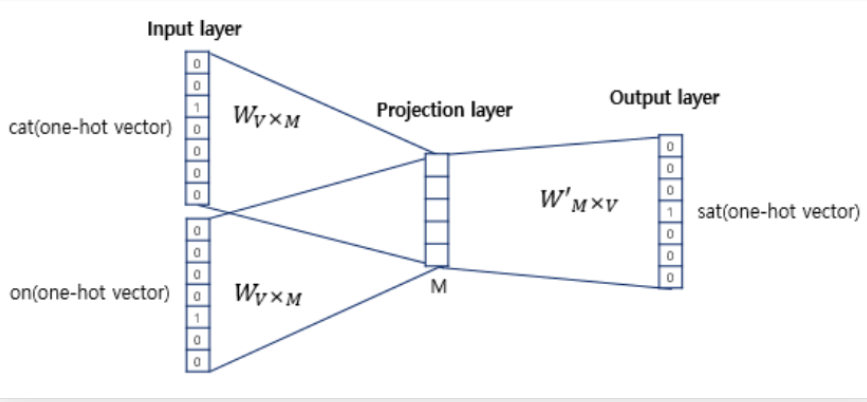

- 투사층의 크기 = M (=5, CBOW 모델 결과로 도출된 워드임베딩 벡터의 차원)
- 입력층의 가중치 행렬 W의 크기 = V * M  
   (V: 단어의 개수)
- 출력층의 가중치 행렬 W'의 크기 = M * V
- 입력벡터를 통해 출력벡터를 맞추기 위해 계속 학습하며 가중치 행렬 W, W'를 갱신함
- 입력벡터와 가중치 행렬의 계산과정은 위키독스 참고

### __2. Skip-gram__


- 중심단어에서 주변단어 예측
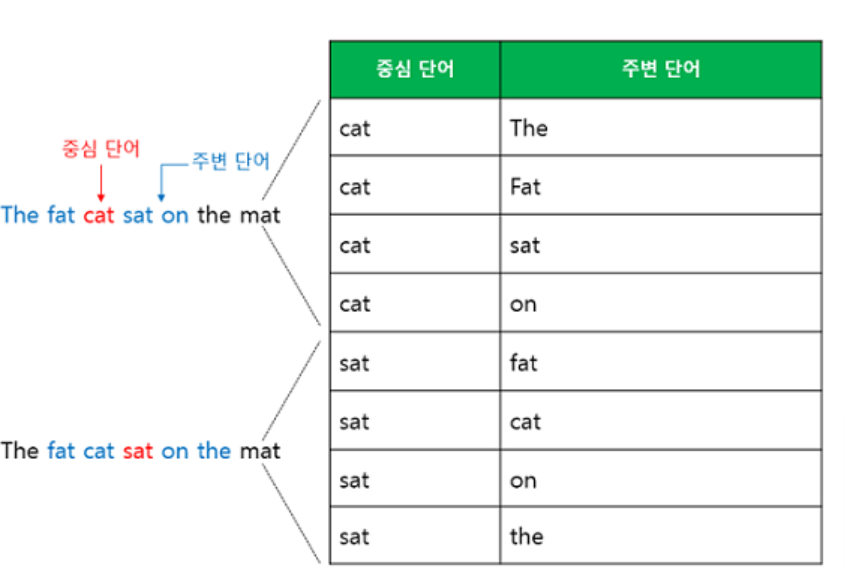

#### Skip-gram의 인공신경망 도식화 (윈도우=2)
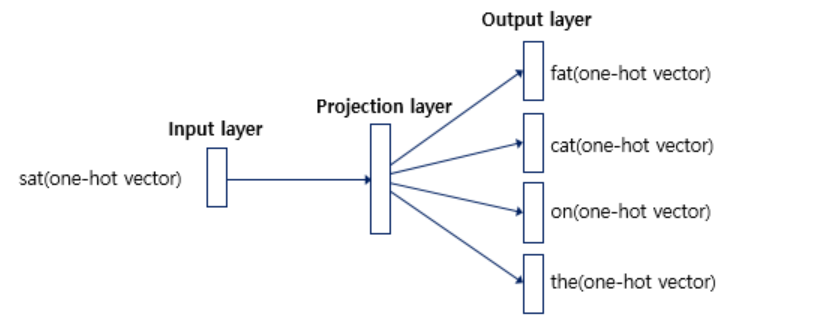

- 성능: Skip-gram > CBOW


### (참고)NNLM vs Word2Vec
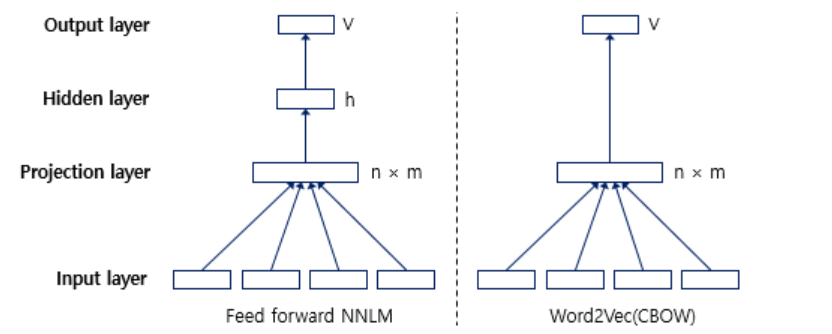

- NNLM: 단어 간 유사도 구할 수 있도록 임베딩의 개념 도임한 것
- NNLM의 느린 학습 속도와 정확도 개선한 것이 Word2Vec
- NNLM: 다음 단어 예측 / 예측 단어 이전 단어들만 참고
- Word2Vec(CBOW): 중심 단어 예측 / 예측 단어의 전, 후 단어 모두 참고 / NNLM에 있는 은닉층 제거
- Word2Vec가 NNLM보다 학습속도가 좋은 이유  
   1) 은닉층 제거  
   2) 추가적으로 사용하는 기법: 계층적 소프트맥스(hierarchical softmax)와 네거티브 샘플링(negative sampling)


## __10-3) 영어 / 한국어 Word2Vec 실습__

### __1. 영어 Word2Vec 만들기__

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# 데이터 다운
rllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f7877870310>)

In [ ]:
# 데이터: xml문법으로 작성되어 있음, 자연어 얻기 위한 전처리 진행
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

content_text = re.sub(r'\([^)]*\)', '', parse_text)

sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
# 샘플 3개만 출력, 토큰화 수행됨
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [ ]:
# Word2Vec 훈련시키기
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [ ]:
# Word2Vec는 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원
# man과 가장 유사한 단어 확인

model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8437614440917969), ('guy', 0.8249386548995972), ('lady', 0.7924230098724365), ('boy', 0.7745752334594727), ('gentleman', 0.7566918730735779), ('girl', 0.748012363910675), ('soldier', 0.7428044080734253), ('poet', 0.7039470076560974), ('kid', 0.7002741098403931), ('physicist', 0.6721844673156738)]


In [ ]:
# 모델 저장
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')

- 한국어 Word2Vec 만들기(네이버 영화 리뷰)
- 한국어 Word2Vec 만들기(위키피디아)
- 위의 실습은 위키독스 보면서 각자 해보면 좋을 듯

## __10-4) 네거티브 샘플링을 이용한 Word2Vec 구현(Skip-Gram with Negative Sampling, SGNS)__

- 네거티브 샘플링(Negative Sampling)을 사용하는 Word2Vec을 직접 케라스(Keras)를 통해 구현 예정  

### __1. 네거티브 샘플링(Negative Sampling)__
- Word2Vec의 출력층에서는 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트함
- **Word2Vec은 꽤나 학습하기에 무거운 모델**
- 현재 집중하고 있는 단어가 '강아지'와 '고양이', '귀여운'과 같은 단어라면, '돈가스'나 '컴퓨터'와 같은 수많은 단어의 임베딩 벡터값까지 업데이트하는 것은 비효율적
- 네거티브 샘플링은 **Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 하는 방법**

- 가령, 현재 집중하고 있는 주변 단어가 '고양이', '귀여운'이라고 하면 여기에 '돈가스', '컴퓨터', '회의실'과 같은 단어 집합에서 무작위로 선택된 주변 단어가 아닌 단어들을 일부 가져옴
- **하나의 중심 단어에 대해서 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단계를 이진 분류 문제로 변환**
- **주변 단어들을 긍정(positive), 랜덤으로 샘플링 된 단어들을 부정(negative)으로 레이블링** 
- Word2Vec보다 훨씬 연산량에서 효율적

### __2. 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)__

- Skip-Gram: 중심단어로부터 주변단어 예측하는 모델
- SGNS: 네거티브 샘플링을 사용하는 Skip-gram(Skip-Gram with Negative Sampling)
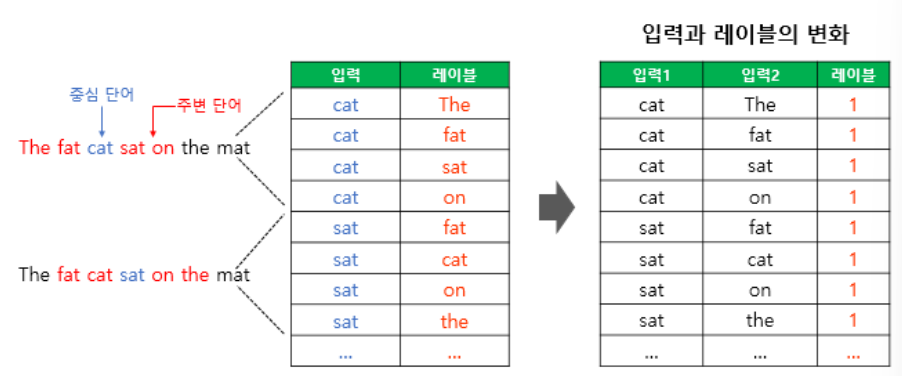

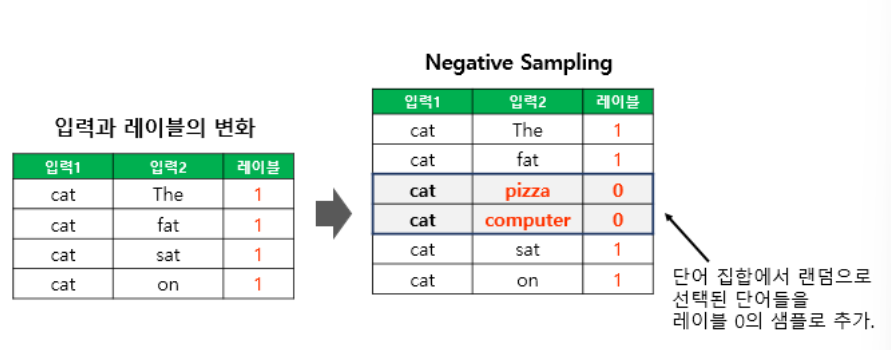

- 윈도우 크기 내에서 이웃 관계 -> 레이블 = 1 
- 윈도우 크기 내에서 이웃 관계 x -> 레이블 = 0


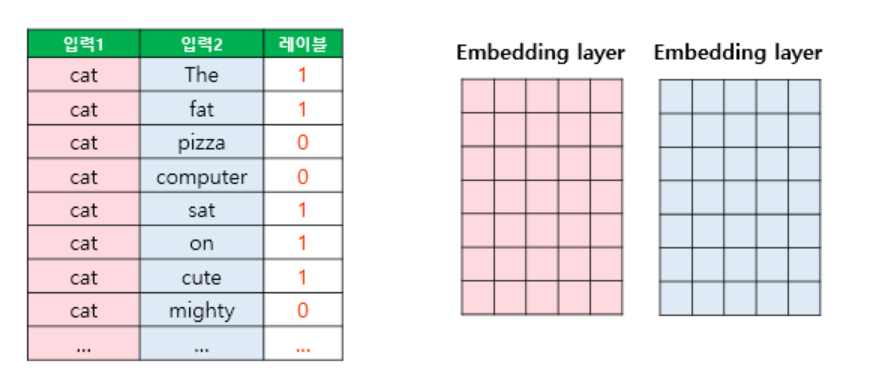

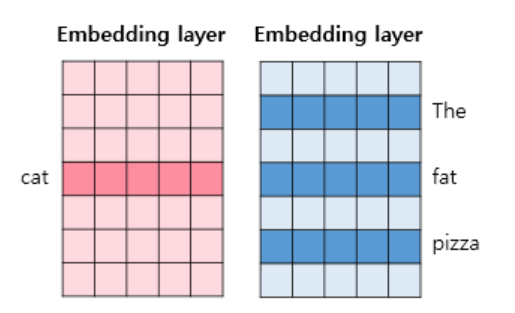

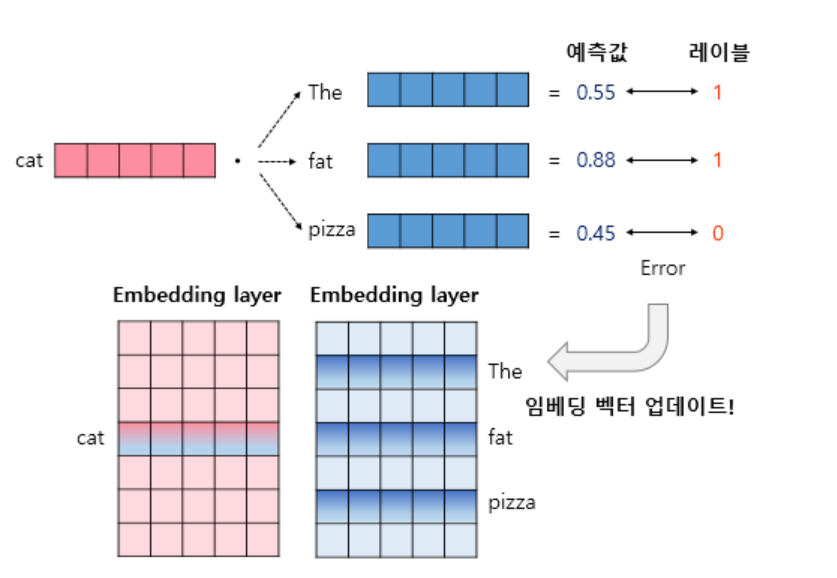

- 중심 단어와 주변 단어의 내적값을 이 모델의 예측값
- 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트

- 관련 실습: 위키독스 참고

## __10-5) 글로브(GloVe)__

- (복습)   
   * 워드임베딩: 컴퓨터가 자연어를 이해할 수 있도록 변환하는 과정  
   * 최근에 많이 사용하는 방법: 워드투벡터(Word2Vec), 글로브(GloVe)

- 글로브는 카운트 기반과 예측 기반을 모두 사용하는 단어 임베딩 방법론
- 카운트 기반(LSA) & 예측기반(Word2Vec) 단점 보완
- Word2Vec vs GloVe: 두 가지 전부를 사용해보고 성능이 더 좋은 것을 사용하는 것이 바람직

### __1. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)__

- 행과 열을 전체 단어 집합의 단어들로 구성
- i행 k열: i단어의 윈도우 크기 내에서 k 단어가 등장한 횟수
- ex)   
   I like deep learning  
   I like NLP  
   I enjoy flying

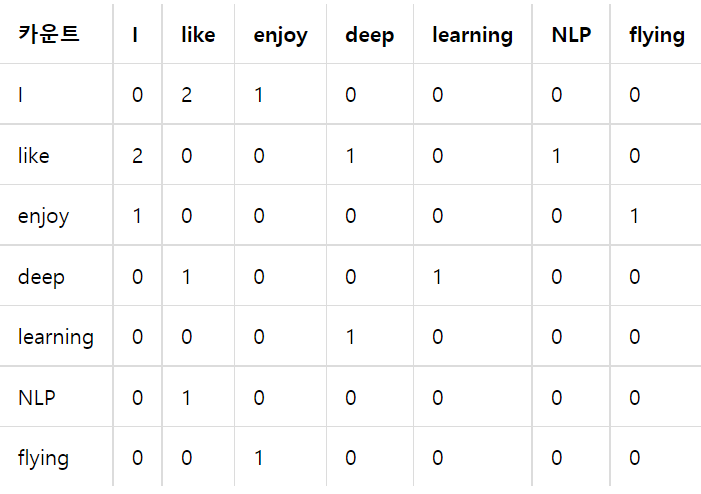

### __2. 동시 등장 확률(Co-occurrence Probability)__

- 동시 등장 확률(P(k|i) 는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률

- GloVe의 제안 논문에서 가져온 동시 등장 확률을 정리한 표
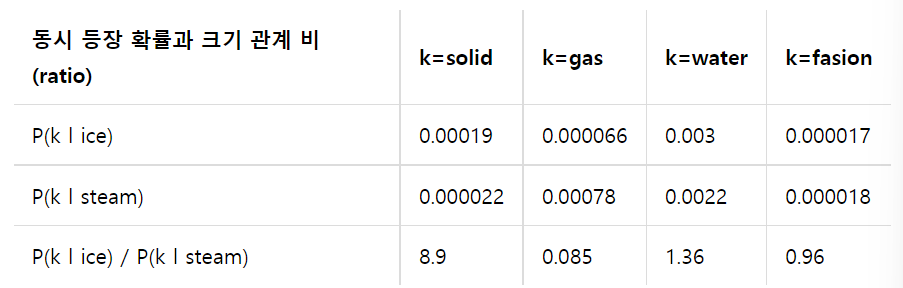

- ice가 등장했을 때 solid가 등장할 확률 0.00019은 steam이 등장했을 때 solid가 등장할 확률인 0.000022보다 약 8.9배 크다
- solid: 단단한, steam: 증기
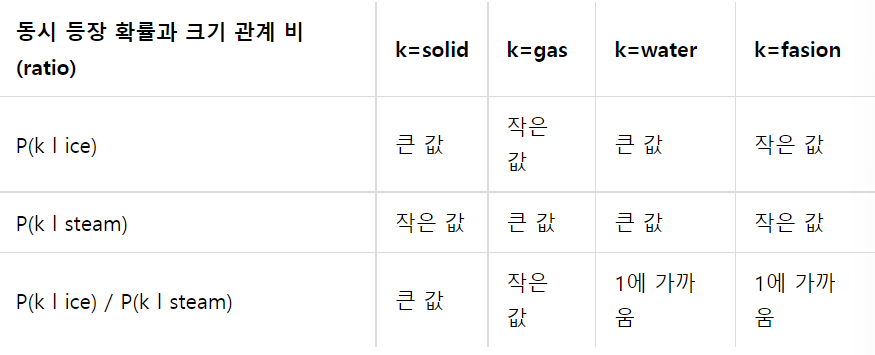

- 1에 가까움: 두 단어 모두 동시 등장하는 경우 비슷하게 나옴

### __3. 손실 함수(Loss function)__
- 동시 등장 행렬과 동시 등장 확률의 이해를 바탕으로 손실 함수를 설계
- 글로브의 아이디어: **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'**
- 필요한 변수
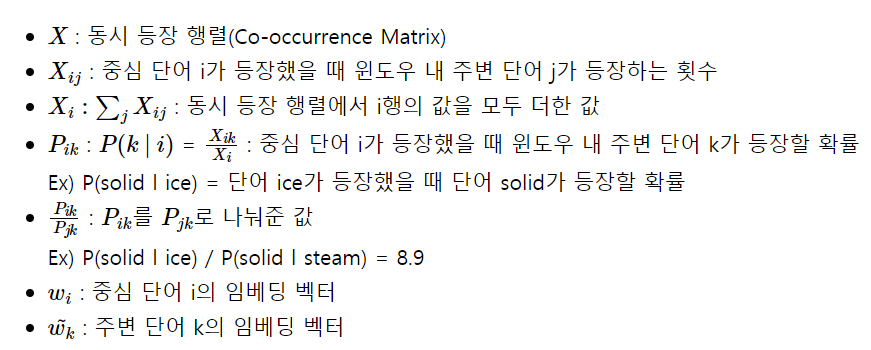


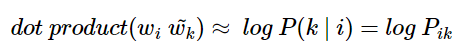

- 위와 같은 관계를 가지도록 임베딩 벡터 설계
- 구체적인 원리는 위키독스 참고
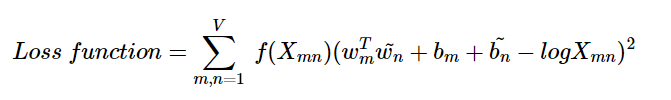

### __4. GloVe 훈련시키기__

In [ ]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 4.1 MB/s 


In [ ]:
# 앞 실습 데이터 사용
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [ ]:
model_result1=glove.most_similar("man")
print(model_result1)

# Word2Vec는 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원
# man과 가장 유사한 단어 확인

# model_result = model.wv.most_similar("man")
# print(model_result)
# [('woman', 0.8437614440917969), ('guy', 0.8249386548995972), ('lady', 0.7924230098724365), ('boy', 0.7745752334594727), ('gentleman', 0.7566918730735779), ('girl', 0.748012363910675), ('soldier', 0.7428044080734253), ('poet', 0.7039470076560974), ('kid', 0.7002741098403931), ('physicist', 0.6721844673156738)]

[('woman', 0.9602280175143767), ('guy', 0.8835641048327788), ('girl', 0.8662450013879732), ('young', 0.8423897407640818)]


In [ ]:
model_result2=glove.most_similar("boy")
print(model_result2)

[('girl', 0.9396377701565063), ('woman', 0.8432089358177837), ('man', 0.823863389739932), ('kid', 0.8188539960141613)]


## __10-5) 패스트텍스트(FastText)__

- 단어를 벡터로 만드는 또 다른 방법
- 페이스북에서 개발
- Word2Vec 이후에 나온 것 -> Word2Vec의 확장
- Word2Vec vs FastText  
   :Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주 (즉, 내부 단어 고려하여 학습)

### __1. 내부단어(subword)의 학습__
- 각 단어는 글자 단위 n-gram의 구성으로 취급
- n을 몇으로 결정하는지에 따라서 단어들이 얼마나 분리되는지 결정
- ex) n = 3의 경우, apple은 app, ppl, ple로 분리하고 이들을 벡터로 만듦
-  시작과 끝을 의미하는 <, >를 도입하여 아래의 5개 내부 단어(subword) 토큰을 벡터로 만듦
- 특별토큰(기존 단어에 <, 와 >를 붙인 토큰) 추가
```
# n = 3인 경우
<ap, app, ppl, ple, le>, <apple>
```
- 실제 사용할 때: n의 최솟값과 최댓값으로 범위를 설정
- 만약 최솟값 = 3, 최댓값 = 6인 경우, 아래 단어들에 대해 Word2Vec 수행
```
# n = 3 ~ 6인 경우
<ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., <apple>
```
- 단어 apple의 벡터값은 벡터값들의 총 합으로 구성
```
apple = <ap + app + ppl + ppl + le> + <app + appl + pple + ple> + <appl + pple> + , ..., +<apple>
```

### __2. 모르는 단어(Out Of Vocabulary, OOV)에 대한 대응__

- FastText의 인공 신경망을 학습한 후에는 데이터 셋의 모든 단어의 각 n-gram에 대해서 워드 임베딩이 진행됨
- **내부 단어(Subword)를 통해 모르는 단어(Out Of Vocabulary, OOV)에 대해서도 다른 단어와의 유사도를 계산 가능**
- ex) birthplace 란 단어를 학습하지 않은 상태,   
   하지만 다른 단어에서 birth와 place라는 내부 단어가 있었다면, FastText는 birthplace의 벡터를 얻을 수 있음
- 모르는 단어에 제대로 대처할 수 없는 Word2Vec, GloVe와는 다른 점

### __3. 단어 집합 내 빈도 수가 적었던 단어(Rare Word)에 대한 대응__ 

- Word2Vec의 경우에는 등장 빈도 수가 적은 단어(rare word)에 대해서는 임베딩의 정확도가 높지 않다는 단점
-  FastText의 경우, 만약 단어가 희귀 단어라도, 그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우라면, Word2Vec과 비교하여 비교적 높은 임베딩 벡터값을 얻음
- Word2Vec에서는 오타가 섞인 단어는 임베딩이 제대로 되지 않지만 FastText는 이에 대해서도 일정 수준의 성능을 보임


### __4. 실습으로 비교하는 Word2Vec Vs. FastText__


In [ ]:
# Word2Vec
model.wv.most_similar("electrofishing")

KeyError: ignored

- 모르는 단어에 대해서는 임베딩 벡터가 존재하지 않기 때문에 단어의 유사도를 계산할 수 없음

In [ ]:
# FastText
from gensim.models import FastText
model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [ ]:
model.wv.most_similar("electrofishing")

[('electrolux', 0.7755187153816223),
 ('electro', 0.7680946588516235),
 ('electrolyte', 0.7636541128158569),
 ('airbus', 0.7596672177314758),
 ('airbag', 0.7568837404251099),
 ('electrochemical', 0.7534465789794922),
 ('fishing', 0.7482554912567139),
 ('electric', 0.7464150190353394),
 ('overfishing', 0.7381763458251953),
 ('electroshock', 0.7359374165534973)]

- Word2Vec는 학습하지 않은 단어에 대해서 유사한 단어를 찾아내지 못 했지만, FastText는 유사한 단어를 계산해서 출력하고 있음

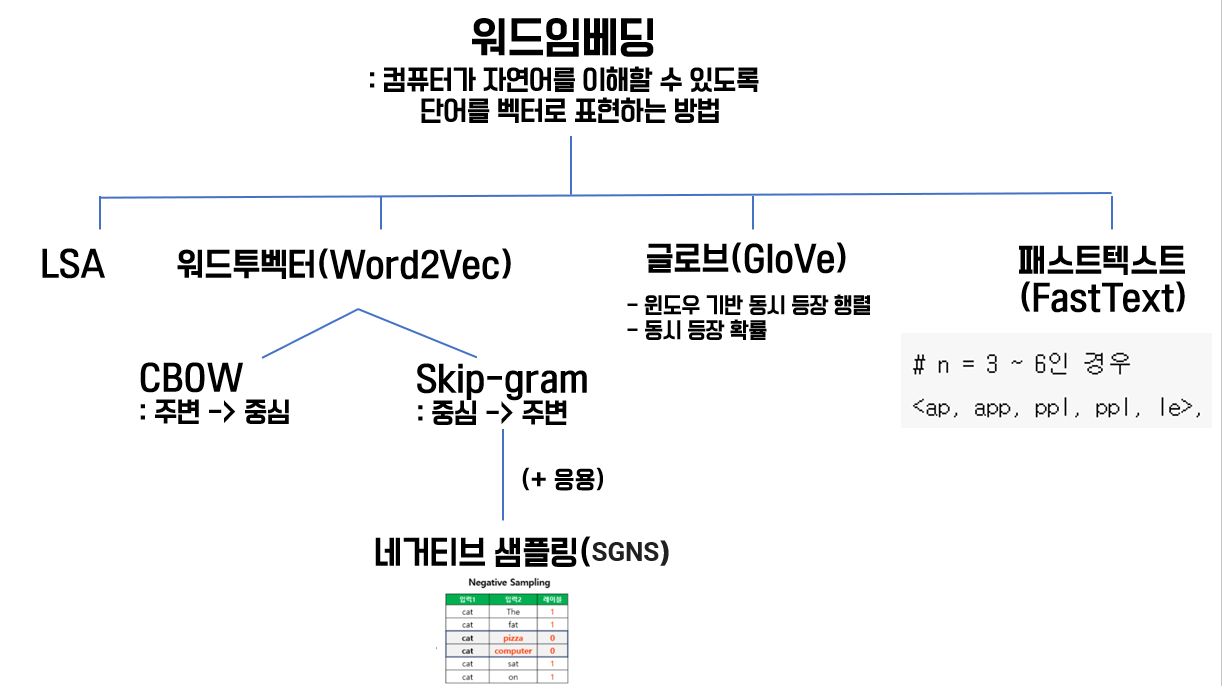